In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch

from inxss import Particle

/global/homes/z/zhantao/.conda/envs/sqt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# prior_pos = torch.vstack([torch.rand(1,1000) * 100, torch.randn(1,1000)])
# _w = torch.rand(1000)
# prior_configs = {'positions': prior_pos, 'weights': _w / _w.sum()}

# prior_configs = {'types': ['uniform', 'normal'], 'args': [{'low': -10, 'high': 10}, {'loc': 5, 'scale': 10}]}

In [7]:
prior_configs = {'types': ['uniform', 'normal'], 'args': [{'low': -10, 'high': 10}, {'loc': 5, 'scale': 10}]}

particle = Particle(1000, 2, prior_configs=prior_configs).to('cuda:0')

In [8]:
pos = particle.positions.detach().cpu().numpy()

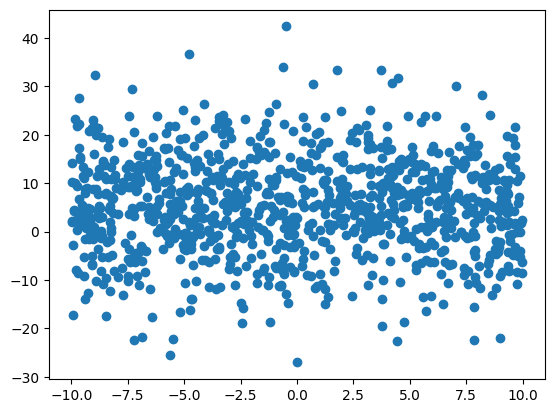

In [9]:
fig, ax = plt.subplots()
ax.scatter(pos[0], pos[1])
# ax.set_aspect('equal')

In [6]:
particle.eval()

Particle()

In [7]:
particle.positions

Parameter containing:
tensor([[ 8.8735e+01,  9.5458e+01,  6.5983e+01,  ...,  1.8708e+01,
          8.7793e+01,  4.6627e+01],
        [ 4.9022e-01, -2.7939e-01, -2.2249e-01,  ...,  7.4351e-01,
         -5.1259e-02,  6.6064e-01]], device='cuda:0', requires_grad=True)

In [8]:
particle.cov().diag().sqrt()

tensor([28.3476,  0.9611], device='cuda:0', grad_fn=<SqrtBackward0>)

In [9]:
particle.std()

tensor([28.3476,  0.9611], device='cuda:0', grad_fn=<SqrtBackward0>)

In [11]:
particle.resample()